# 2주차 Report

전복(abalone) 데이터를 가지고,

머신러닝 분류, 회귀

신경망 분류, 회귀를 각각 수행하라

## 1. Data Load

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [159]:
df = pd.read_csv("C:/Project/DeepLearning/Data/abalone.csv", index_col=0) # \는 콜백문자 때문에 \\로 사용한다.
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [160]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [161]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Text(0.5, 1.0, 'Rings of abalone')

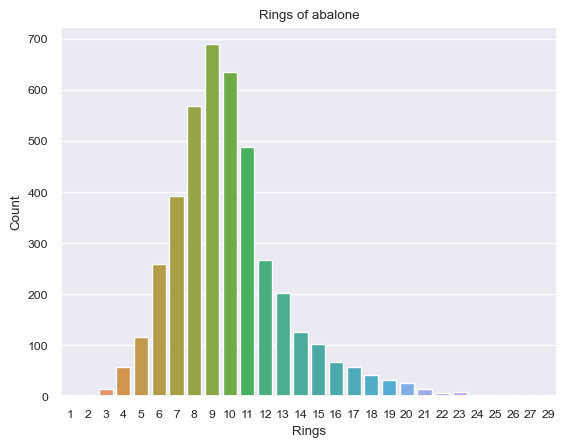

In [162]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings of abalone")

Text(0.5, 1.0, 'Sex of Abalone')

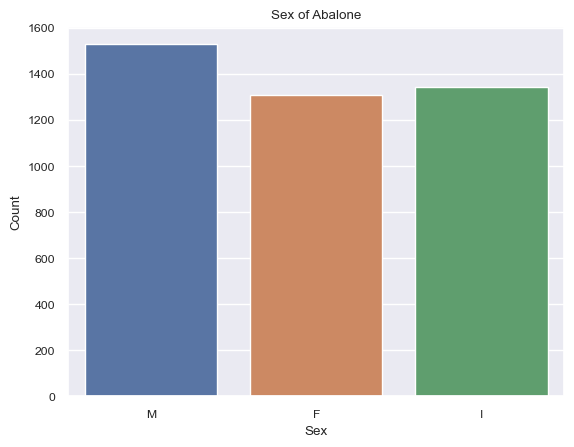

In [163]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex of Abalone")

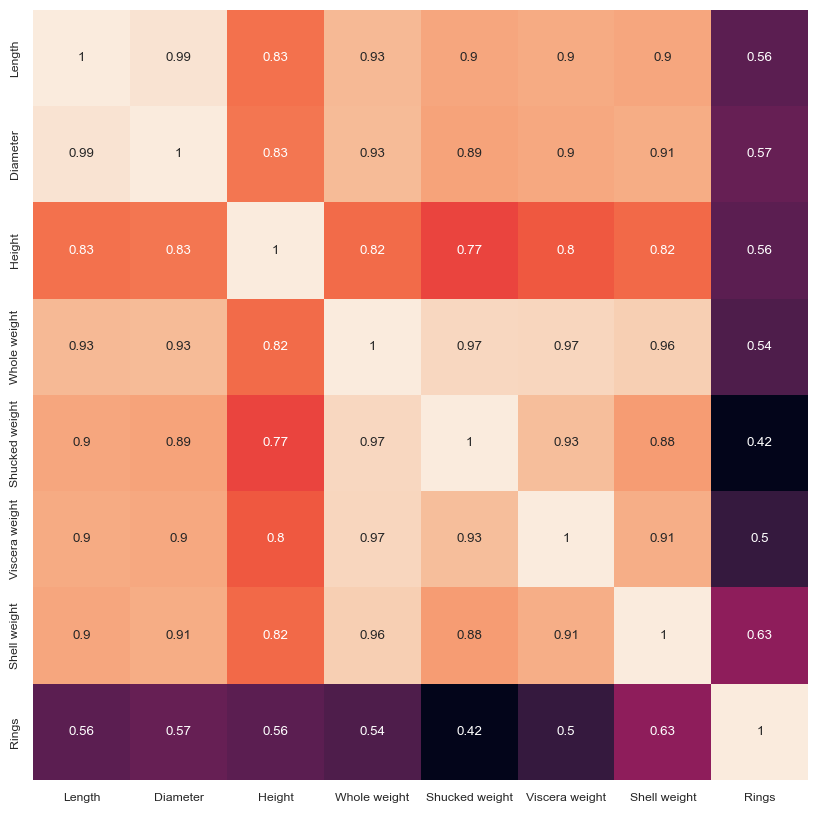

In [164]:
df_corr = df[[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

Ring은 다른 특성들과의 상관관계가 특히 낮다. 

Abalone 데이터에 따르면, Ring 값에 1.5를 더하면 전복의 나이가 된다고 한다.

In [165]:
# Convert RingCount to Age by adding 1.5, accoring to codebook
df['Age'] = df['Rings'] + 1.5
df.drop('Rings', axis=1, inplace=True)

In [166]:
df['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: Age, dtype: int64

In [167]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5


In [168]:
df['Sex'].value_counts()
# 2 M
# 1 I
# 0 F

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

## 2. Train Test Split

In [206]:
X=df.drop(['Age'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [207]:
y=df['Age']
y.value_counts().sort_index(ascending=True)

2.5       1
3.5       1
4.5      15
5.5      57
6.5     115
7.5     259
8.5     391
9.5     568
10.5    689
11.5    634
12.5    487
13.5    267
14.5    203
15.5    126
16.5    103
17.5     67
18.5     58
19.5     42
20.5     32
21.5     26
22.5     14
23.5      6
24.5      9
25.5      2
26.5      1
27.5      1
28.5      2
30.5      1
Name: Age, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,,
3750,1,0.435,0.375,0.110,0.4155,0.1700,0.0760,0.1450
2206,0,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.0400
1126,2,0.560,0.430,0.145,0.8995,0.4640,0.1775,0.2340
1365,2,0.610,0.475,0.170,1.0265,0.4350,0.2335,0.3035
784,1,0.215,0.155,0.060,0.0525,0.0210,0.0165,0.0150
...,...,...,...,...,...,...,...,...
3916,0,0.520,0.410,0.160,0.7120,0.2845,0.1530,0.2250
1283,1,0.500,0.375,0.145,0.5795,0.2390,0.1375,0.1850
3714,0,0.725,0.560,0.185,1.7920,0.8730,0.3670,0.4350


In [209]:
y_train.value_counts().sort_index(ascending=True)

3.5       1
4.5       9
5.5      42
6.5      85
7.5     207
8.5     315
9.5     461
10.5    556
11.5    507
12.5    386
13.5    220
14.5    159
15.5    104
16.5     81
17.5     51
18.5     52
19.5     34
20.5     26
21.5     20
22.5      8
23.5      2
24.5      8
25.5      2
26.5      1
27.5      1
28.5      2
30.5      1
Name: Age, dtype: int64

In [210]:
y_test.value_counts().sort_index(ascending=True)

2.5       1
4.5       6
5.5      15
6.5      30
7.5      52
8.5      76
9.5     107
10.5    133
11.5    127
12.5    101
13.5     47
14.5     44
15.5     22
16.5     22
17.5     16
18.5      6
19.5      8
20.5      6
21.5      6
22.5      6
23.5      4
24.5      1
Name: Age, dtype: int64

## 3. Machine Learning

In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 3.1 Regression

#### 3.1.1 SVR

In [212]:
from sklearn.svm import SVR

rg_svm = SVR() # Support Vector Regression
rg_svm.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

print('--- SVR 모델점수 ---\n', '{:.5f}'.format(rg_svm.score(X_test, y_test)))

pred_svm = rg_svm.predict(X_test) # 이번에는 테스트 데이터로 테스트한 값을 pred_svm에 저장

mse = mean_squared_error(pred_svm, y_test)
print('\n--- MSE ---')
print('{:.5f}'.format(mse))

--- SVR 모델점수 ---
 0.52673

--- MSE ---
5.23910


#### 3.1.2 LR (Linear Regression)

In [213]:
from sklearn.linear_model import LinearRegression

rg_lr = LinearRegression()
rg_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(rg_lr.score(X_test, y_test)))

preds_lr = rg_lr.predict(X_test)
mse = np.sqrt(mean_squared_error(preds_lr, y_test))
print('\n--- MSE ---')
print('{:.5f}'.format(mse))

--- LR 모델점수 ---
 0.57064

--- MSE ---
2.18013


#### 3.1.3 RF (Random Forest)

In [217]:
from sklearn.ensemble import RandomForestRegressor

rg_rf = RandomForestRegressor(random_state=5)
rg_rf.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(rg_rf.score(X_test, y_test)))

preds_rf = rg_rf.predict(X_test)
mse = np.sqrt(mean_squared_error(preds_rf, y_test))
print('\n--- MSE ---')
print('{:.5f}'.format(mse))

--- RF 모델점수 ---
 0.59112

--- MSE ---
2.12751


#### 3.1.4 DT (Decision Tree)

In [216]:
from sklearn.tree import DecisionTreeRegressor
# Build a decision tree classifier and predict

rg_dt = DecisionTreeRegressor(random_state=12)
rg_dt.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(rg_dt.score(X_test, y_test)))

preds_dt = rg_dt.predict(X_test)
mse = np.sqrt(mean_squared_error(preds_dt, y_test))
print('\n--- MSE ---')
print('{:.5f}'.format(mse))

--- RF 모델점수 ---
 0.24059

--- MSE ---
2.89943


### 3.2 Classification

나중에 함

## 4. Deep Learning

In [223]:
df = pd.read_csv("C:/Project/DeepLearning/Data/abalone.csv", index_col=0) # \는 콜백문자 때문에 \\로 사용한다.
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [231]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [232]:
X=df.drop('Rings', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [239]:
y=df['Rings']
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [240]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
id,,,,,,,,
940,1,0.460,0.345,0.105,0.4490,0.1960,0.0945,0.1265
2688,2,0.630,0.465,0.150,1.0270,0.5370,0.1880,0.1760
1948,2,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535
713,2,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695
3743,0,0.705,0.555,0.195,1.7525,0.7105,0.4215,0.5160
...,...,...,...,...,...,...,...,...
1033,2,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,2,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535


In [236]:
X_train.shape[1]

8

In [248]:
y_test.shape[1]

28

In [250]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(28, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.02), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 28)                924       
                                                                 
Total params: 12412 (48.48 KB)
Trainable params: 12412 (48.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [252]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
98/98 [==============================] - 0s 2ms/step - loss: 1.9236 - accuracy: 0.2854 - val_loss: 2.0135 - val_accuracy: 0.2459
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 1.9185 - accuracy: 0.2819 - val_loss: 1.9938 - val_accuracy: 0.2660
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 1.9114 - accuracy: 0.2886 - val_loss: 1.9564 - val_accuracy: 0.2641
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 1.9206 - accuracy: 0.2711 - val_loss: 1.9744 - val_accuracy: 0.2565
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 1.9320 - accuracy: 0.2775 - val_loss: 2.0256 - val_accuracy: 0.2450
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 1.9093 - accuracy: 0.2934 - val_loss: 1.9798 - val_accuracy: 0.2584
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 1.9128 - accuracy: 0.2816 - val_loss: 1.9846 - val_accuracy: 0.2699
Epoch 8/100
9

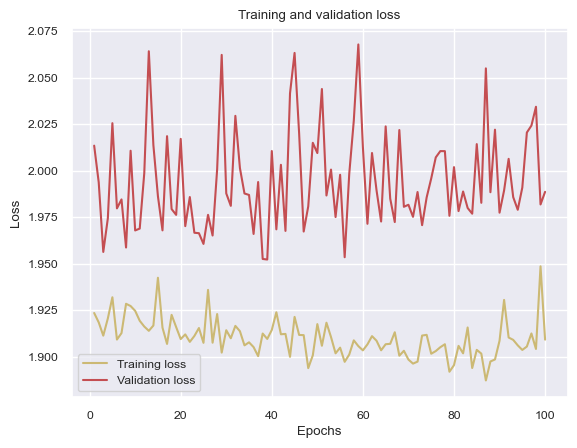

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

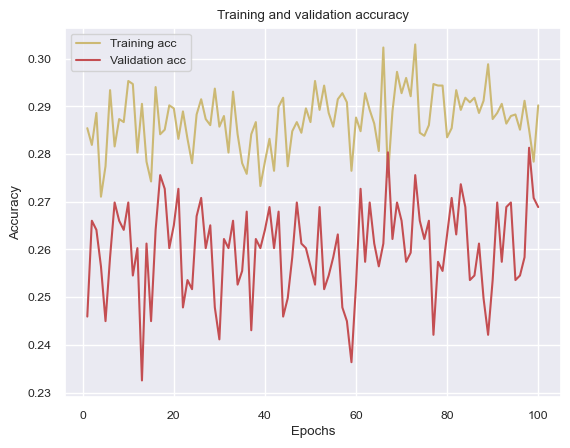

In [254]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [255]:
#Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.19      0.38      0.26        13
           4       0.32      0.30      0.31        40
           5       0.34      0.38      0.36        63
           6       0.42      0.33      0.37       114
           7       0.48      0.29      0.37       139
           8       0.28      0.49      0.36       152
           9       0.19      0.37      0.25       139
          10       0.28      0.16      0.20       121
          11       0.00      0.00      0.00        93
          12       0.16      0.29      0.21        51
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00        22
          15       0.04      0.06      0.05        16
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00        10
          19       0.00    

C:\Users\Choij\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Choij\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Choij\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Choij\anaconda3\Lib\site-packages\sklearn\metrics\_cla